In [2]:
import json
import matplotlib.pyplot as plt


In [3]:
with open("/home/jacobuni/uni-projects/P9/p9-ssl_for_noise-robust_kws/results/results_paper_known.json", "r") as f: 
    known = json.load(f)

with open("/home/jacobuni/uni-projects/P9/p9-ssl_for_noise-robust_kws/results/results_paper_unknown.json", "r") as f: 
    unknown = json.load(f)

with open("/home/jacobuni/uni-projects/P9/p9-ssl_for_noise-robust_kws/results/results_baseline_full_known.json", "r") as f: 
    full_known = json.load(f)

with open("/home/jacobuni/uni-projects/P9/p9-ssl_for_noise-robust_kws/results/results_baseline_full_unknown.json", "r") as f: 
    full_unknown = json.load(f)

labels = {"BC": "Baseline - clean", "BM": "Baseline - MTR", "DC": "Data2Vec - clean", "DPC": "Data2Vec - clean + noisy", "DPN": "Data2Vec - noisy", "DD": "Data2Vec - denoising", "d2v_full": "Data2Vec - denoising - full", "base_full": "Baseline - MTR - full"}
colors = {"BC": "silver", "BM": "dimgray", "DC": "mediumseagreen", "DPC": "mediumpurple", "DPN": "cornflowerblue", "DD": "red"}

In [4]:
results_known = {}
for kwt in known:
    results_known[kwt] = {}
    for snr in known[kwt]:
        for model in known[kwt][snr]:
            if model in results_known[kwt]:
                results_known[kwt][model][snr] = float(known[kwt][snr][model])
            else:
                results_known[kwt][model] = {}
                results_known[kwt][model][snr] = float(known[kwt][snr][model])
results_known_full = {}
for kwt in full_known:
    results_known_full[kwt] = {}
    for snr in full_known[kwt]:
        for model in full_known[kwt][snr]:
            if model in results_known_full[kwt]:
                results_known_full[kwt][model][snr] = float(full_known[kwt][snr][model])
            else:
                results_known_full[kwt][model] = {}
                results_known_full[kwt][model][snr] = float(full_known[kwt][snr][model])

In [5]:
results_unknown = {}
for kwt in unknown:
    results_unknown[kwt] = {}
    for snr in unknown[kwt]:
        for model in unknown[kwt][snr]:
            if model in results_unknown[kwt]:
                results_unknown[kwt][model][snr] = float(unknown[kwt][snr][model])
            else:
                results_unknown[kwt][model] = {}
                results_unknown[kwt][model][snr] = float(unknown[kwt][snr][model])
results_unknown_full = {}
for kwt in full_unknown:
    results_unknown_full[kwt] = {}
    for snr in full_unknown[kwt]:
        for model in full_unknown[kwt][snr]:
            if model in results_unknown_full[kwt]:
                results_unknown_full[kwt][model][snr] = float(full_unknown[kwt][snr][model])
            else:
                results_unknown_full[kwt][model] = {}
                results_unknown_full[kwt][model][snr] = float(full_unknown[kwt][snr][model])

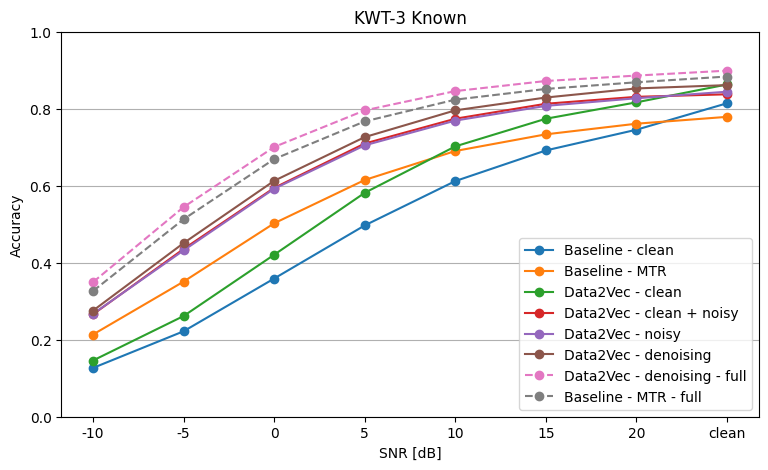

In [6]:
# for kwt in results_known:
kwt = "kwt3"
fig, ax = plt.subplots(figsize=(9,5))
for key in results_known[kwt]:
    ax.plot(results_known[kwt][key].keys(), results_known[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
# ax.set_ylim(0,1.1)
for key in results_known_full[kwt]:
    ax.plot(results_known_full[kwt][key].keys(), results_known_full[kwt][key].values(), '--o', label = labels[key]) #, color=colors[key])
ax.legend(loc = 'lower right')
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
ax.yaxis.grid(True)
plt.title(kwt[:-1].upper() + "-" + kwt[-1] + " Known")
plt.savefig(f"full/{kwt}_known.pdf")
plt.show()

/tmp/ipykernel_9074/82183322.py:29: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f"full/all_known.pdf", bbox_inches='tight')
/tmp/ipykernel_9074/82183322.py:29: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f"full/all_known.pdf", bbox_inches='tight')
/home/jacobuni/miniconda3/envs/sslkwsenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


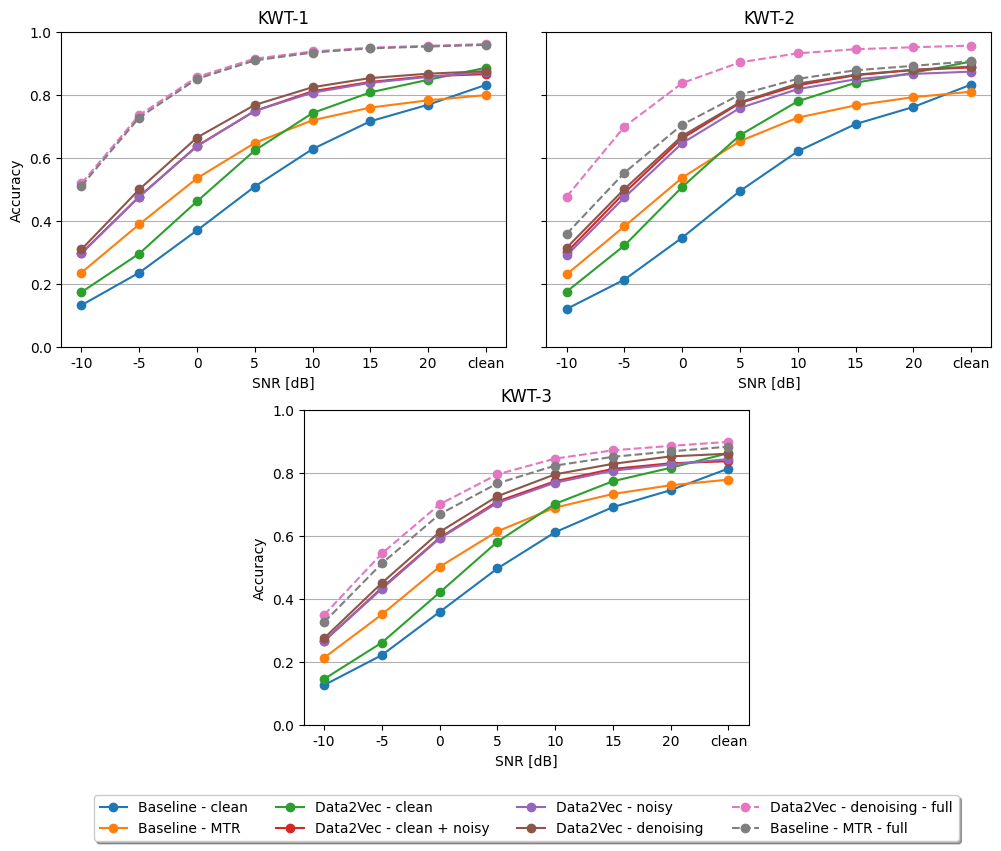

In [8]:
ax = plt.figure(layout="constrained", figsize=(12,9)).subplot_mosaic(
    """
    AABB
    .CC.
    """
)
plot = ['A', 'B', 'C']
i = 0
for kwt in results_known:
    for key in results_known[kwt]:
        ax[plot[i]].plot(results_known[kwt][key].keys(), results_known[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
    # ax.set_ylim(0,1.1)
    for key in results_known_full[kwt]:
        ax[plot[i]].plot(results_known_full[kwt][key].keys(), results_known_full[kwt][key].values(), '--o', label = labels[key]) #, color=colors[key])
    ax[plot[i]].set_ylabel('Accuracy')
    ax[plot[i]].yaxis.grid(True)
    ax[plot[i]].set_ylim(0,1)
    ax[plot[i]].set_title(kwt[:-1].upper() + "-" + kwt[-1])
    ax[plot[i]].get_xaxis().set_visible(True)
    ax[plot[i]].set_xlabel('SNR [dB]')
    i += 1

ax['C'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
ax['B'].set_yticklabels([])
ax['B'].set_ylabel('')

# plt.title(kwt[:-1].upper() + "-" + kwt[-1])
# plt.tight_layout()
plt.savefig(f"full/all_known.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_9074/69482797.py:29: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f"full/all_unknown.pdf", bbox_inches='tight')
/tmp/ipykernel_9074/69482797.py:29: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f"full/all_unknown.pdf", bbox_inches='tight')
/home/jacobuni/miniconda3/envs/sslkwsenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


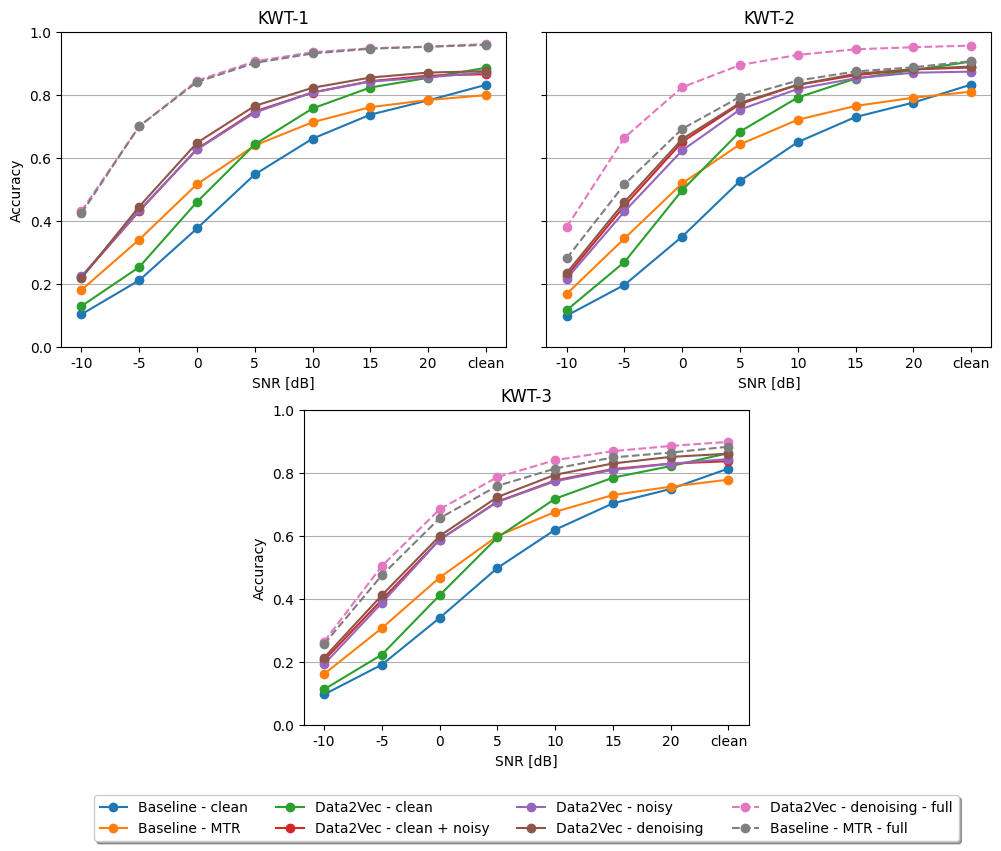

In [9]:
ax = plt.figure(layout="constrained", figsize=(12,9)).subplot_mosaic(
    """
    AABB
    .CC.
    """
)
plot = ['A', 'B', 'C']
i = 0
for kwt in results_unknown:
    for key in results_unknown[kwt]:
        ax[plot[i]].plot(results_unknown[kwt][key].keys(), results_unknown[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
    # ax.set_ylim(0,1.1)
    for key in results_unknown_full[kwt]:
        ax[plot[i]].plot(results_unknown_full[kwt][key].keys(), results_unknown_full[kwt][key].values(), '--o', label = labels[key]) #, color=colors[key])
    ax[plot[i]].set_ylabel('Accuracy')
    ax[plot[i]].yaxis.grid(True)
    ax[plot[i]].set_ylim(0,1)
    ax[plot[i]].set_title(kwt[:-1].upper() + "-" + kwt[-1])
    ax[plot[i]].get_xaxis().set_visible(True)
    ax[plot[i]].set_xlabel('SNR [dB]')
    i += 1

ax['C'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
ax['B'].set_yticklabels([])
ax['B'].set_ylabel('')

# plt.title(kwt[:-1].upper() + "-" + kwt[-1])
# plt.tight_layout()
plt.savefig(f"full/all_unknown.pdf", bbox_inches='tight')
plt.show()